<a href="https://colab.research.google.com/github/wksiazak/Diabetes-Logistic-Regression/blob/master/Diabetes_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data analysis and initial feature engineering

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes['Class'].unique()

array(['positive', 'negative'], dtype=object)

To build model let's convert column "Class" into numeric vales, like "positive"  = 1 and "negative" = 0

In [ ]:
diabetes['Class'] = diabetes['Class'].replace({'positive': 1, 'negative': 0})

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

We see that feature "Class" is not balanaced equally. Definetely there are more cases which are nor classified as diabetes almost doubled number of samples. Let's see how it will impact on Logistic Regression model.  

In [ ]:
y = diabetes.pop('Class')
X = diabetes

In [ ]:
# podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##Logistic Regression

In [ ]:
# inicjalizacja regresji logistycznej
model_1 = LogisticRegression()
# trenowanie modelu
model_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_1 = model_1.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_1)

array([[87,  9],
       [23, 35]])

We see that 87 sample were correctly classifed as no diabetes, and 35 as diabetes. 23 of samples were wrongly classifed as non-diabetes while in fact those are diabetes.



In [ ]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        96
           1       0.80      0.60      0.69        58

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.79      0.79      0.79       154



##Ridge regularization

In [ ]:
alpha_values = [0.1, 1, 10, 100] #let's test different values of alpha

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)


    ridge_model.fit(X_train, y_train)


    y_pred_2 = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_2)

    print(f"Alpha = {alpha}, MSE = {mse}")

Alpha = 0.1, MSE = 0.1541059236934424
Alpha = 1, MSE = 0.15409968997775952
Alpha = 10, MSE = 0.154099308847884
Alpha = 100, MSE = 0.15499424139087392


In [ ]:
print("\nLogistic Regression:")
for alpha in alpha_values:
    logistic_model = LogisticRegression(penalty='l2', C=1/alpha, solver='lbfgs', max_iter=1000)

    # Dopasowanie modelu do danych treningowych
    logistic_model.fit(X_train, y_train)

    # Przewidywanie etykiet dla danych testowych
    y_pred_logistic = logistic_model.predict(X_test)

    # Obliczanie dokładności modelu
    accuracy = accuracy_score(y_test, y_pred_logistic)

    print(f"Alpha = {alpha}, Accuracy = {accuracy}")


Logistic Regression:
Alpha = 0.1, Accuracy = 0.8051948051948052
Alpha = 1, Accuracy = 0.8051948051948052
Alpha = 10, Accuracy = 0.8051948051948052
Alpha = 100, Accuracy = 0.8051948051948052


We see that alpha value has no impact on accuracy of model and MSE.

In [ ]:
model = LogisticRegression(penalty='l2', solver='liblinear', C=0.9)
model.fit(X_train, y_train)

LogisticRegression(C=0.9, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[90  6]
 [21 37]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        96
           1       0.86      0.64      0.73        58

    accuracy                           0.82       154
   macro avg       0.84      0.79      0.80       154
weighted avg       0.83      0.82      0.82       154



After Ridge regularization we received slightly better results. But still we cannot state that our model is providing satisfactory results, because still diabetes are not classified "properly" - still some samples are wrongly classifed as no-diabetes.

Let's try use Oversampling.  

## Oversampling

In [ ]:
# oversampling only on train data
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [ ]:
# after oversampling we see that we have equally splitted
Counter(y_train_over)

Counter({0: 404, 1: 404})

In [ ]:
# Logistic regression model on data after oversampling
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_over = model_over.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_over)
print(conf_matrix)

[[76 20]
 [15 43]]


In [ ]:
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        96
           1       0.68      0.74      0.71        58

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.77       154



Oversampling is giving more "balanced" results.  Let's try to use it also SMOTE and Class Weight method.  

##SMOTE

In [ ]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

Counter({0: 404, 1: 404})

In [ ]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_smote = model_smote.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_smote)
print(conf_matrix)

[[73 23]
 [16 42]]


In [ ]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        96
           1       0.65      0.72      0.68        58

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



##Class weight

In [ ]:
model_weight = LogisticRegression(class_weight = 'balanced')
model_weight.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_weight = model_weight.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_weight)
print(conf_matrix)

[[74 22]
 [13 45]]


In [ ]:
print(classification_report(y_test, y_pred_weight))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        96
           1       0.67      0.78      0.72        58

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



Text(0.5, 1.0, 'ROC AUC - Logistic Regression model')

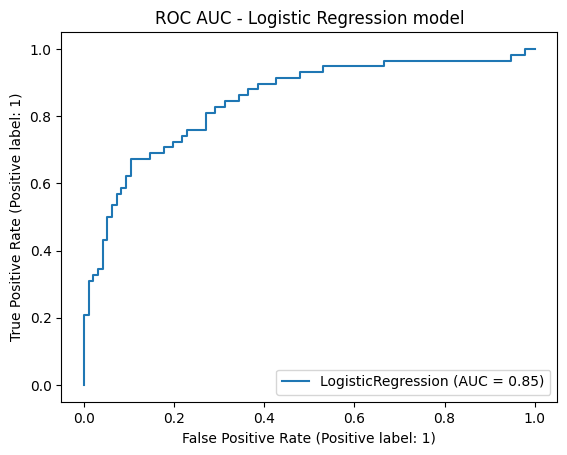

In [ ]:
RocCurveDisplay.from_estimator(model_1, X_test, y_test) #for Logistic Regression
plt.title("ROC AUC - Logistic Regression model")

Text(0.5, 1.0, 'ROC AUC - SMOTE model')

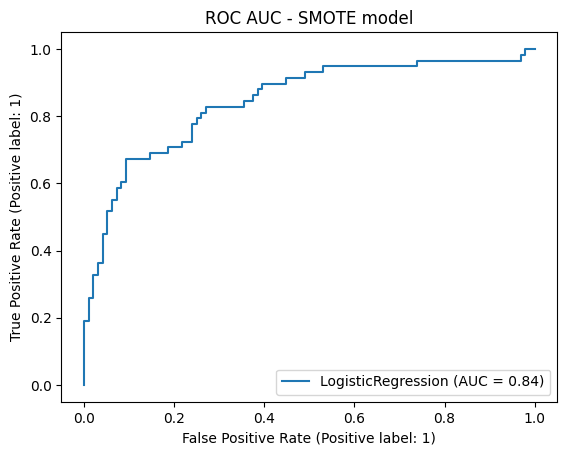

In [ ]:
RocCurveDisplay.from_estimator(model_smote, X_test, y_test) # SMOTE
plt.title("ROC AUC - SMOTE model")

Text(0.5, 1.0, 'ROC AUC - Class weight model')

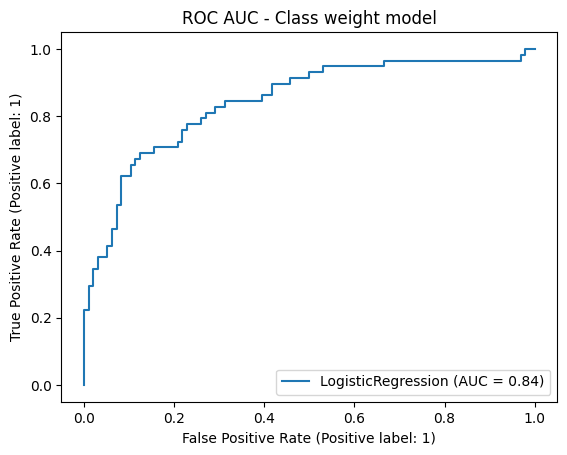

In [ ]:
RocCurveDisplay.from_estimator(model_weight, X_test, y_test) # model_weight
plt.title("ROC AUC - Class weight model")

##Summary

-  in this data set we can see how important is properly balanced data set - poorly balanced data set may cause wrongly classification of data
- Oversampling, SMOTE, Class weight methods are improving classification for recognizing diabetes - AUC above 85% says that those models are properly classifing test values